# ISPU Data Exploratory Data Analysis (EDA)

**Purpose:** Comprehensive data quality report for the combined ISPU dataset.

---

## Setup & Load Data

In [35]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

# =====================
# CONFIG
# =====================
NA_VALUES = ["---", "--", "", " ", "NA", "N/A"]

# Attempt to locate the combined CSV
def find_file(name, start=Path.cwd()):
    for ancestor in [start] + list(start.parents):
        matches = list(ancestor.rglob(name))
        if matches:
            return matches[0]
    return None

csv_path = find_file("ispu_all_years_duplicate_handled.csv")
if not csv_path:
    csv_path = find_file("ispu_all_years_max_handled.csv")

if csv_path:
    print(f"✅ Loading CSV from: {csv_path}")
    df = pd.read_csv(csv_path, na_values=NA_VALUES)
else:
    print("❌ CSV file not found!")
    df = pd.DataFrame()

✅ Loading CSV from: c:\Users\veiro\Documents\datavidia\AIR-POLLUTION-PREDICTION-PENYISIHAN-DATAVIDIA-10\ispu_named copy\ispu_all_years_duplicate_handled.csv


## 1. Dataset Overview

In [36]:
print("="*80)
print("DATASET OVERVIEW")
print("="*80)

print(f"\n📊 Total rows       : {len(df):,}")
print(f"📊 Total columns    : {len(df.columns)}")
print(f"\n📋 Columns:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2}. {col}")

DATASET OVERVIEW

📊 Total rows       : 16,717
📊 Total columns    : 13

📋 Columns:
   1. periode_data
   2. tanggal
   3. stasiun
   4. pm_sepuluh
   5. pm_duakomalima
   6. sulfur_dioksida
   7. karbon_monoksida
   8. ozon
   9. nitrogen_dioksida
  10. max
  11. parameter_pencemar_kritis
  12. kategori
  13. id


## 2. Data Types & Missing Values

In [37]:
print("\n" + "="*80)
print("DATA TYPES & BASIC INFO")
print("="*80)
print(df.info())


DATA TYPES & BASIC INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16717 entries, 0 to 16716
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   periode_data               16717 non-null  int64  
 1   tanggal                    16717 non-null  object 
 2   stasiun                    16717 non-null  object 
 3   pm_sepuluh                 14561 non-null  float64
 4   pm_duakomalima             6608 non-null   float64
 5   sulfur_dioksida            14947 non-null  float64
 6   karbon_monoksida           15053 non-null  float64
 7   ozon                       14922 non-null  float64
 8   nitrogen_dioksida          14968 non-null  float64
 9   max                        15259 non-null  float64
 10  parameter_pencemar_kritis  15259 non-null  object 
 11  kategori                   16717 non-null  object 
 12  id                         16717 non-null  object 
dtypes: float64(7), int64(

In [38]:
# Per-column data quality report
print("\n" + "="*80)
print("PER-COLUMN DATA QUALITY REPORT")
print("="*80)

report = []

for col in df.columns:
    total = len(df)
    null_count = df[col].isna().sum()
    unique_count = df[col].nunique(dropna=True)

    sample_values = (
        df[col]
        .dropna()
        .astype(str)
        .unique()[:3]
    )

    report.append({
        "column": col,
        "dtype": str(df[col].dtype),
        "null_count": null_count,
        "null_pct": round(null_count / total * 100, 2),
        "unique_values": unique_count,
        "sample_values": ", ".join(sample_values)
    })

report_df = pd.DataFrame(report).sort_values("null_pct", ascending=False)
print(report_df.to_string(index=False))


PER-COLUMN DATA QUALITY REPORT
                   column   dtype  null_count  null_pct  unique_values                                              sample_values
           pm_duakomalima float64       10109     60.47            156                                          89.0, 101.0, 99.0
               pm_sepuluh float64        2156     12.90            148                                           60.0, 32.0, 27.0
                     ozon float64        1795     10.74            267                                           27.0, 33.0, 20.0
          sulfur_dioksida float64        1770     10.59             82                                              4.0, 2.0, 3.0
        nitrogen_dioksida float64        1749     10.46             95                                             14.0, 9.0, 6.0
         karbon_monoksida float64        1664      9.95             94                                           73.0, 16.0, 19.0
                      max float64        1458      8.72   

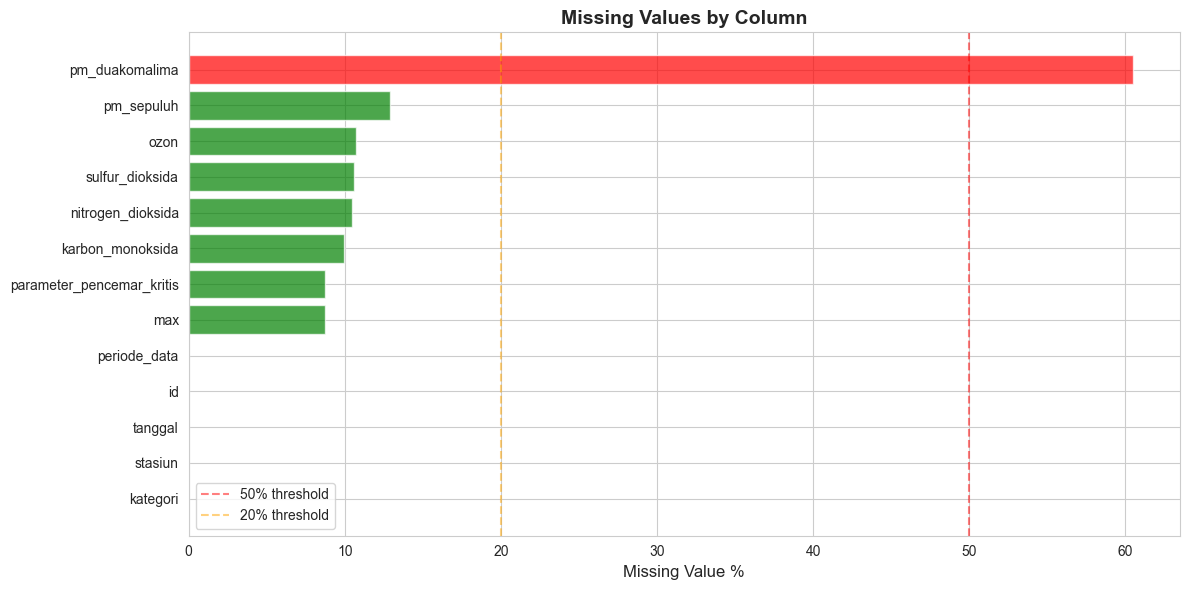

In [39]:
# Visualize missing value percentages
fig, ax = plt.subplots(figsize=(12, 6))
null_pcts = report_df.sort_values('null_pct', ascending=True)
colors = ['red' if x > 50 else 'orange' if x > 20 else 'green' for x in null_pcts['null_pct']]
ax.barh(null_pcts['column'], null_pcts['null_pct'], color=colors, alpha=0.7)
ax.set_xlabel('Missing Value %', fontsize=12)
ax.set_title('Missing Values by Column', fontsize=14, fontweight='bold')
ax.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
ax.axvline(x=20, color='orange', linestyle='--', alpha=0.5, label='20% threshold')
plt.legend()
plt.tight_layout()
plt.show()

## 3. Date & Time Validation

In [40]:
print("\n" + "="*80)
print("TANGGAL (DATE) VALIDATION")
print("="*80)

if "tanggal" in df.columns:
    parsed_date = pd.to_datetime(df["tanggal"], errors="coerce")
    invalid_date = parsed_date.isna().sum()

    print(f"\n✓ Total records        : {len(df):,}")
    print(f"✓ Valid dates          : {len(df) - invalid_date:,}")
    print(f"❌ Invalid dates        : {invalid_date}")
    print(f"\n📅 Date Range:")
    print(f"   Min: {parsed_date.min()}")
    print(f"   Max: {parsed_date.max()}")
else:
    print("❌ 'tanggal' column not found!")

if "periode_data" in df.columns:
    print(f"\n[PERIODE DATA CHECK]")
    unique_years = sorted(df["periode_data"].astype(str).str[:4].unique())
    print(f"Unique years: {', '.join(unique_years)}")


TANGGAL (DATE) VALIDATION

✓ Total records        : 16,717
✓ Valid dates          : 16,717
❌ Invalid dates        : 0

📅 Date Range:
   Min: 2010-01-01 00:00:00
   Max: 2025-08-31 00:00:00

[PERIODE DATA CHECK]
Unique years: 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025


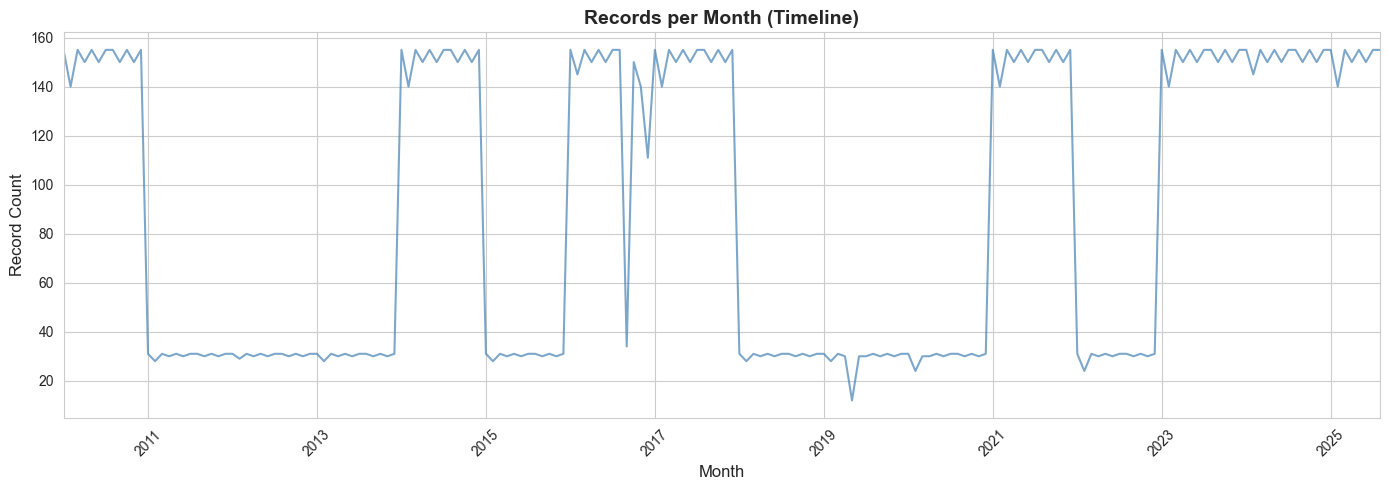

In [41]:
# Timeline visualization
if "tanggal" in df.columns:
    parsed_date = pd.to_datetime(df["tanggal"], errors="coerce")
    date_counts = parsed_date.dt.to_period('M').value_counts().sort_index()
    
    fig, ax = plt.subplots(figsize=(14, 5))
    date_counts.plot(ax=ax, color='steelblue', alpha=0.7)
    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel('Record Count', fontsize=12)
    ax.set_title('Records per Month (Timeline)', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 4. Category & Station Distribution

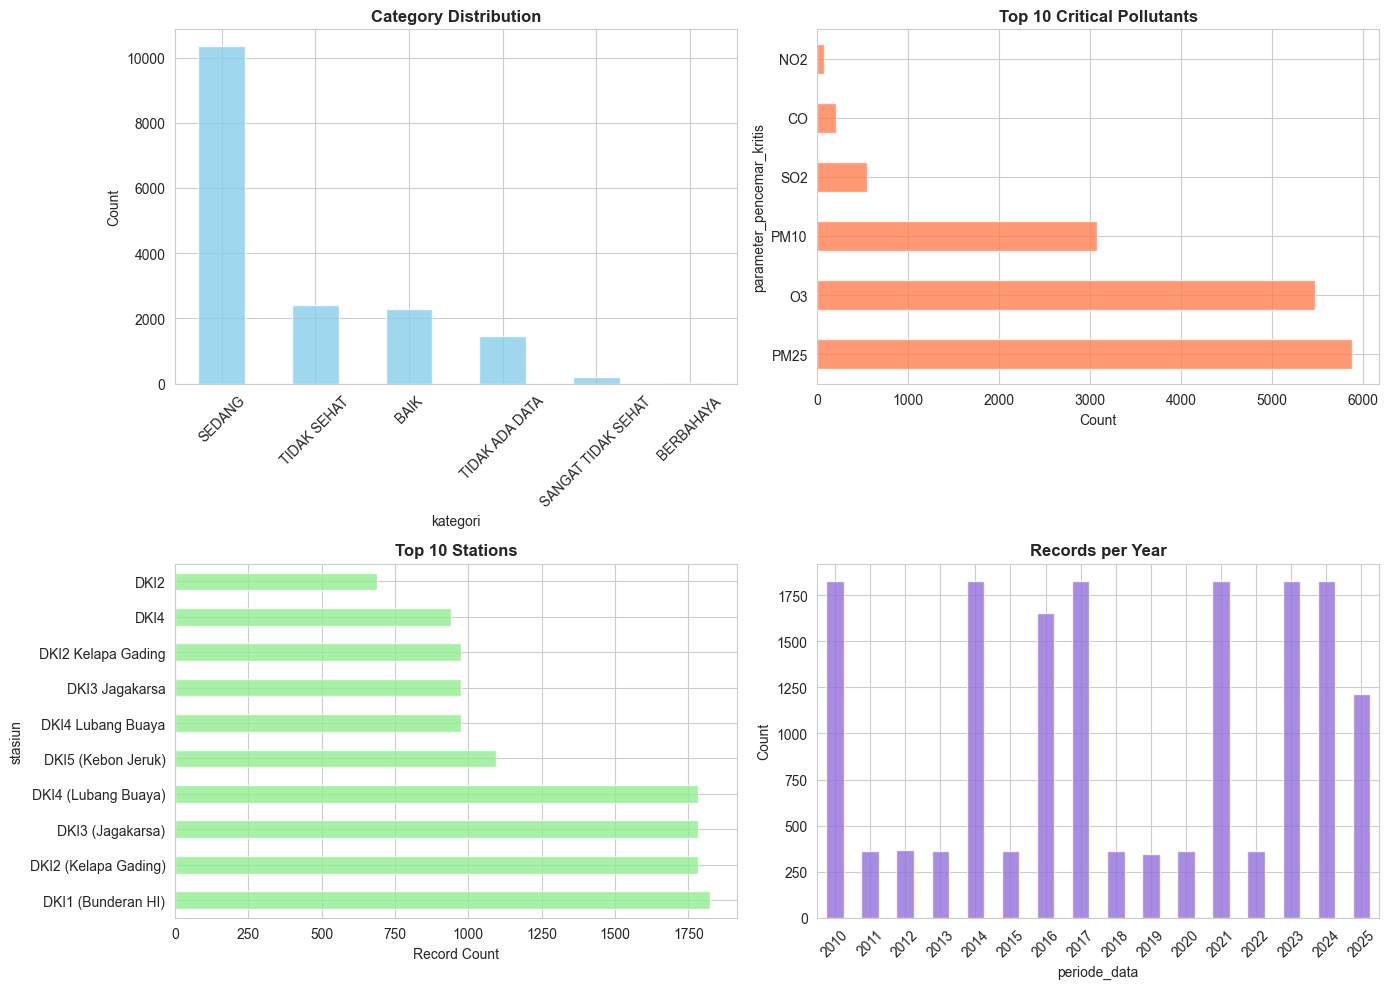

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Category distribution
if "kategori" in df.columns:
    ax = axes[0, 0]
    df["kategori"].value_counts().plot(kind='bar', ax=ax, color='skyblue', alpha=0.8)
    ax.set_title('Category Distribution', fontsize=12, fontweight='bold')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
else:
    axes[0, 0].text(0.5, 0.5, "'kategori' column not found", ha='center', va='center')

# Critical pollutant
if "parameter_pencemar_kritis" in df.columns:
    ax = axes[0, 1]
    top_critical = df["parameter_pencemar_kritis"].value_counts().head(10)
    top_critical.plot(kind='barh', ax=ax, color='coral', alpha=0.8)
    ax.set_title('Top 10 Critical Pollutants', fontsize=12, fontweight='bold')
    ax.set_xlabel('Count')
else:
    axes[0, 1].text(0.5, 0.5, "'parameter_pencemar_kritis' column not found", ha='center', va='center')

# Station distribution
if "stasiun" in df.columns:
    ax = axes[1, 0]
    top_stations = df["stasiun"].value_counts().head(10)
    top_stations.plot(kind='barh', ax=ax, color='lightgreen', alpha=0.8)
    ax.set_title('Top 10 Stations', fontsize=12, fontweight='bold')
    ax.set_xlabel('Record Count')
else:
    axes[1, 0].text(0.5, 0.5, "'stasiun' column not found", ha='center', va='center')

# Year distribution
if "periode_data" in df.columns:
    ax = axes[1, 1]
    years = df["periode_data"].astype(str).str[:4]
    years.value_counts().sort_index().plot(kind='bar', ax=ax, color='mediumpurple', alpha=0.8)
    ax.set_title('Records per Year', fontsize=12, fontweight='bold')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
else:
    axes[1, 1].text(0.5, 0.5, "'periode_data' column not found", ha='center', va='center')

plt.tight_layout()
plt.show()

## 5. Numeric Columns Statistics

In [43]:
print("\n" + "="*80)
print("NUMERIC COLUMN STATISTICS")
print("="*80)

numeric_cols = df.select_dtypes(include=[np.number]).columns

stats_df = df[numeric_cols].describe().T
print(stats_df)


NUMERIC COLUMN STATISTICS
                     count           mean         std       min       25%  \
periode_data       16717.0  201817.645092  484.527856  201001.0  201409.0   
pm_sepuluh         14561.0      54.124373   18.999446       2.0      42.0   
pm_duakomalima      6608.0      75.870309   24.138361      10.0      60.0   
sulfur_dioksida    14947.0      27.987155   15.635526       0.0      16.0   
karbon_monoksida   15053.0      20.267721   12.178382       0.0      11.0   
ozon               14922.0      53.577000   40.804747       2.0      24.0   
nitrogen_dioksida  14968.0      17.343466   11.579828       0.0      10.0   
max                15259.0      78.108198   33.290966       5.0      57.0   

                        50%       75%       max  
periode_data       201711.0  202305.0  202508.0  
pm_sepuluh             55.0      65.0     187.0  
pm_duakomalima         77.0      91.0     287.0  
sulfur_dioksida        26.0      39.0     112.0  
karbon_monoksida       18.0  

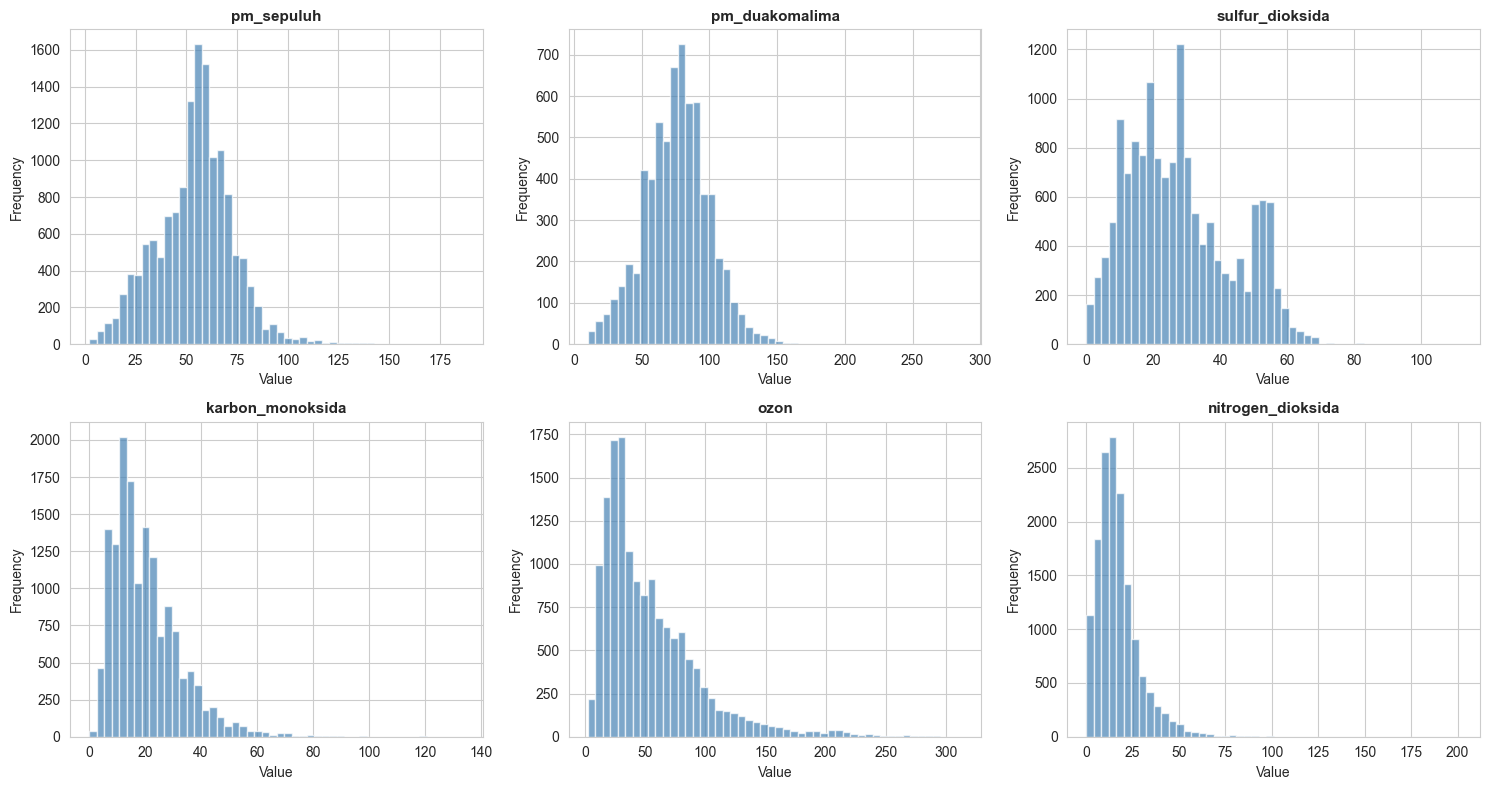

In [44]:
# Pollutant distributions
pollutants = ['pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida']
available_pollutants = [p for p in pollutants if p in df.columns]

if available_pollutants:
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()
    
    for idx, pollutant in enumerate(available_pollutants):
        ax = axes[idx]
        df[pollutant].dropna().hist(bins=50, ax=ax, color='steelblue', alpha=0.7)
        ax.set_title(f'{pollutant}', fontsize=11, fontweight='bold')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
    
    # Hide unused subplots
    for idx in range(len(available_pollutants), 6):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

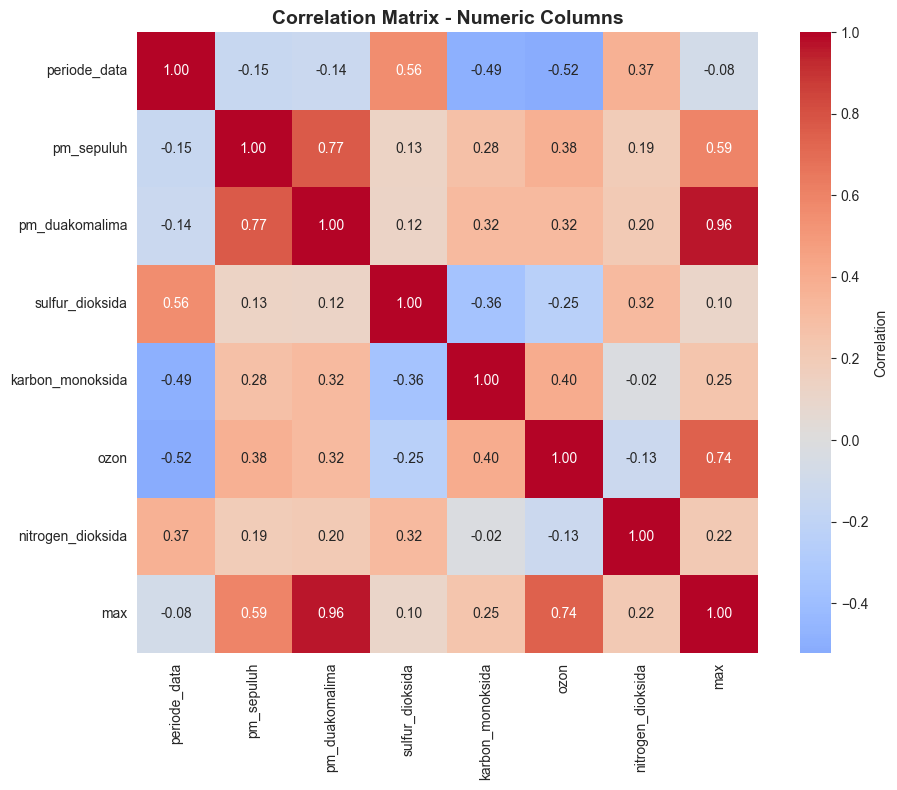

In [45]:
# Correlation heatmap (if multiple numeric columns exist)
if len(numeric_cols) > 1:
    fig, ax = plt.subplots(figsize=(10, 8))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
                square=True, ax=ax, cbar_kws={'label': 'Correlation'})
    ax.set_title('Correlation Matrix - Numeric Columns', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 5.1 Target (Kategori) Correlation Analysis


TARGET (KATEGORI) CORRELATION WITH NUMERIC FEATURES

✅ Feature Correlation with KATEGORI (Target):
max                  0.854309
pm_duakomalima       0.772016
ozon                 0.590313
pm_sepuluh           0.581425
nitrogen_dioksida    0.229228
karbon_monoksida     0.217089
sulfur_dioksida      0.149429
periode_data        -0.033874
dtype: float64


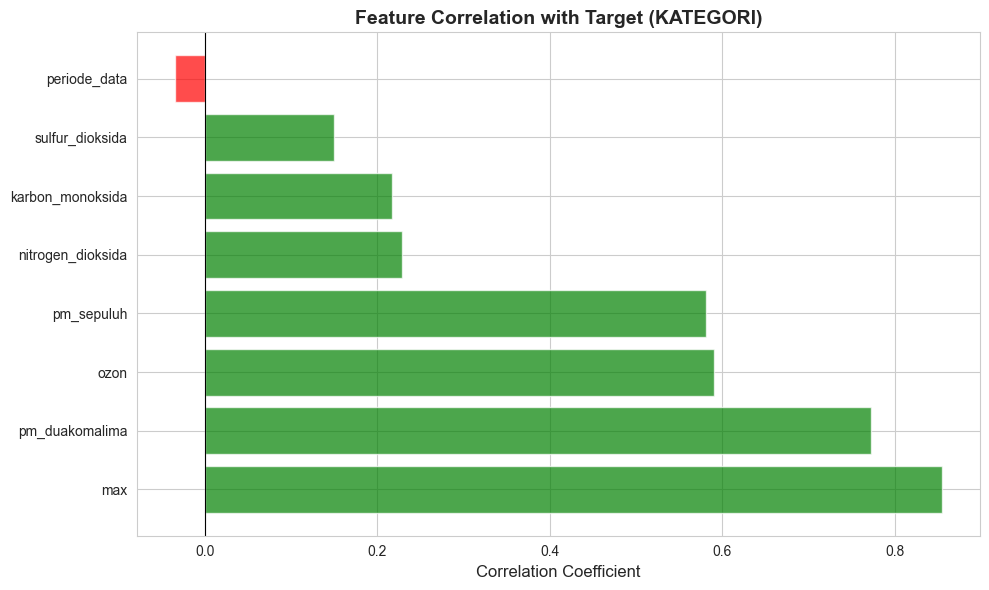

In [46]:
# Encode kategori for correlation analysis
if "kategori" in df.columns:
    print("\n" + "="*80)
    print("TARGET (KATEGORI) CORRELATION WITH NUMERIC FEATURES")
    print("="*80)
    
    # Map kategori to numeric values
    kategori_map = {
        "BAIK": 0,
        "SEDANG": 1,
        "TIDAK SEHAT": 2,
        "SANGAT TIDAK SEHAT": 3,
        "BERBAHAYA": 4
    }
    
    df_target = df.copy()
    df_target['kategori_encoded'] = df_target['kategori'].astype(str).str.strip().map(kategori_map)
    
    # Calculate correlations with target
    if len(numeric_cols) > 0:
        correlations = {}
        for col in numeric_cols:
            # Only calculate if both have non-null values
            valid_mask = df_target[col].notna() & df_target['kategori_encoded'].notna()
            if valid_mask.sum() > 10:  # At least 10 valid pairs
                corr_val = df_target.loc[valid_mask, col].corr(df_target.loc[valid_mask, 'kategori_encoded'])
                correlations[col] = corr_val
        
        corr_series = pd.Series(correlations).sort_values(ascending=False)
        
        print("\n✅ Feature Correlation with KATEGORI (Target):")
        print(corr_series)
        
        # Visualize top correlations
        fig, ax = plt.subplots(figsize=(10, 6))
        colors_corr = ['green' if x > 0 else 'red' for x in corr_series.values]
        ax.barh(corr_series.index, corr_series.values, color=colors_corr, alpha=0.7)
        ax.set_xlabel('Correlation Coefficient', fontsize=12)
        ax.set_title('Feature Correlation with Target (KATEGORI)', fontsize=14, fontweight='bold')
        ax.axvline(x=0, color='black', linewidth=0.8)
        plt.tight_layout()
        plt.show()
    else:
        print("❌ No numeric columns found for correlation analysis")
else:
    print("❌ 'kategori' column not found!")


📊 Creating correlation heatmap for KATEGORI...


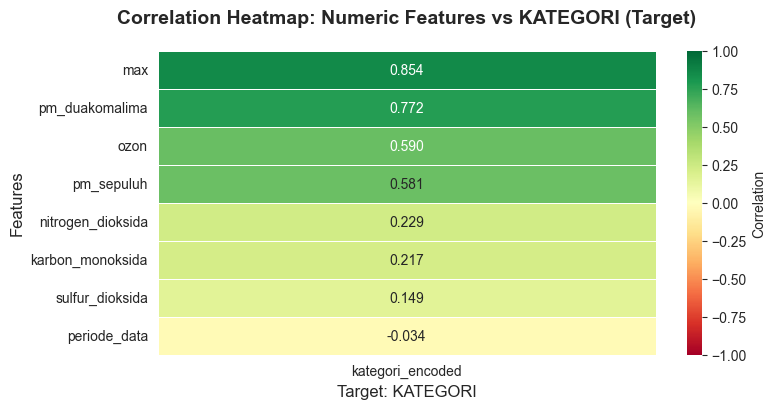

✅ Heatmap created!


In [47]:
# Heatmap: Kategori correlation with all numeric features
if "kategori" in df.columns and len(numeric_cols) > 0:
    print("\n📊 Creating correlation heatmap for KATEGORI...")
    
    # Create dataframe with target and numeric features
    df_corr = df_target[list(numeric_cols) + ['kategori_encoded']].copy()
    
    # Calculate correlation matrix
    corr_matrix = df_corr.corr()
    
    # Extract only kategori row
    kategori_corr = corr_matrix[['kategori_encoded']].drop('kategori_encoded').sort_values('kategori_encoded', ascending=False)
    
    # Create heatmap
    fig, ax = plt.subplots(figsize=(8, len(numeric_cols) * 0.4 + 1))
    sns.heatmap(kategori_corr, annot=True, fmt='.3f', cmap='RdYlGn', center=0, 
                cbar_kws={'label': 'Correlation'}, ax=ax, vmin=-1, vmax=1, linewidths=0.5)
    ax.set_title('Correlation Heatmap: Numeric Features vs KATEGORI (Target)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Target: KATEGORI', fontsize=12)
    ax.set_ylabel('Features', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    print("✅ Heatmap created!")
else:
    print("⚠️  Missing 'kategori' or numeric columns for heatmap")


POLLUTANT DISTRIBUTIONS BY CATEGORY


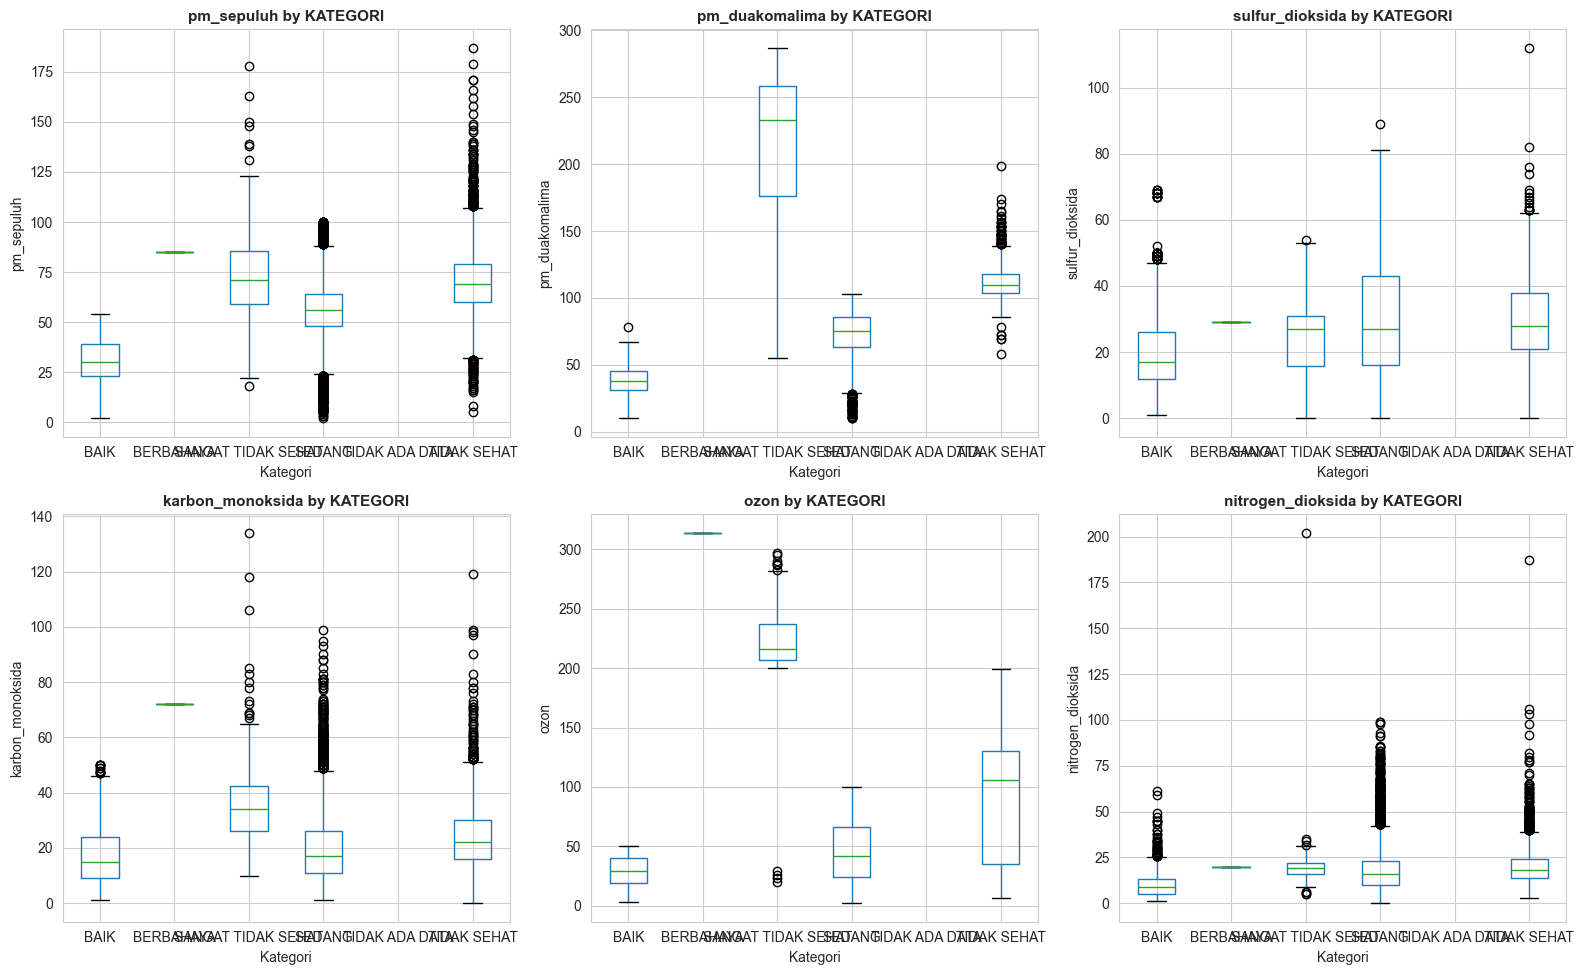

In [48]:
# Category-wise pollutant distributions (box plots by kategori)
if "kategori" in df.columns and len(available_pollutants) > 0:
    print("\n" + "="*80)
    print("POLLUTANT DISTRIBUTIONS BY CATEGORY")
    print("="*80)
    
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()
    
    for idx, pollutant in enumerate(available_pollutants):
        ax = axes[idx]
        df.boxplot(column=pollutant, by='kategori', ax=ax)
        ax.set_title(f'{pollutant} by KATEGORI', fontsize=11, fontweight='bold')
        ax.set_xlabel('Kategori')
        ax.set_ylabel(pollutant)
    
    # Hide unused subplots
    for idx in range(len(available_pollutants), 6):
        axes[idx].set_visible(False)
    
    plt.suptitle('')  # Remove the automatic title
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  Missing 'kategori' or pollutant columns for this analysis")

## 6. ID Validation

In [49]:
print("\n" + "="*80)
print("ID VALIDATION")
print("="*80)

if "id" in df.columns:
    duplicate_ids = df["id"].duplicated().sum()
    null_ids = df["id"].isna().sum()
    total_ids = len(df)
    unique_ids = df["id"].nunique()

    print(f"\n✓ Total rows           : {total_ids:,}")
    print(f"✓ Unique IDs           : {unique_ids:,}")
    print(f"❌ Duplicate IDs        : {duplicate_ids}")
    print(f"❌ Null IDs             : {null_ids}")

    if duplicate_ids > 0:
        print(f"\n⚠️  Sample duplicated IDs:")
        dup_ids = df[df["id"].duplicated(keep=False)].sort_values('id')
        print(dup_ids[['id', 'tanggal', 'stasiun']].head(10))
else:
    print("❌ 'id' column not found!")


ID VALIDATION

✓ Total rows           : 16,717
✓ Unique IDs           : 16,717
❌ Duplicate IDs        : 0
❌ Null IDs             : 0


## 7. MAX & Critical Parameter Validation

In [50]:
print("\n" + "="*80)
print("MAX & PARAMETER PENCEMAR KRITIS VALIDATION")
print("="*80)

# Mapping kolom → label ISPU
polutan_map = {
    "pm_sepuluh": "PM10",
    "pm_duakomalima": "PM25",
    "sulfur_dioksida": "SO2",
    "karbon_monoksida": "CO",
    "ozon": "O3",
    "nitrogen_dioksida": "NO2"
}

# Ensure numeric columns
df_copy = df.copy()
for col in polutan_map:
    if col in df_copy.columns:
        df_copy[col] = pd.to_numeric(df_copy[col], errors="coerce")

# Recalculate max from pollutants
existing_pollutants = [col for col in polutan_map.keys() if col in df_copy.columns]
df_copy["_recalc_max"] = df_copy[existing_pollutants].max(axis=1)

# Validate max values
if "max" in df_copy.columns:
    max_mismatch = df_copy[
        (df_copy["max"].notna()) &
        (df_copy["_recalc_max"].notna()) &
        (df_copy["max"] != df_copy["_recalc_max"])
    ]

    print(f"\n❌ Rows with incorrect max value : {len(max_mismatch)} / {len(df_copy)}")

    if len(max_mismatch) > 0:
        print(f"\n⚠️  Sample MAX mismatches:")
        print(max_mismatch[['tanggal', 'stasiun', 'max', '_recalc_max']].head(10))
else:
    print("❌ 'max' column not found!")


MAX & PARAMETER PENCEMAR KRITIS VALIDATION

❌ Rows with incorrect max value : 0 / 16717


In [51]:
# Validate critical parameter
if "parameter_pencemar_kritis" in df_copy.columns and "max" in df_copy.columns:
    def check_critical(row):
        if pd.isna(row["max"]):
            return True
        for col, label in polutan_map.items():
            if col in df_copy.columns and row[col] == row["max"]:
                return row["parameter_pencemar_kritis"] == label
        return False

    critical_mismatch = df_copy[~df_copy.apply(check_critical, axis=1)]

    print(f"\n❌ Rows with incorrect critical parameter : {len(critical_mismatch)} / {len(df_copy)}")

    if len(critical_mismatch) > 0:
        print(f"\n⚠️  Sample CRITICAL mismatches:")
        print(critical_mismatch[['tanggal', 'stasiun', 'max', 'parameter_pencemar_kritis']].head(10))
    
    if len(max_mismatch) == 0 and len(critical_mismatch) == 0:
        print(f"\n✅ All validations PASSED!")
else:
    print("⚠️  Required columns for critical validation not found")


❌ Rows with incorrect critical parameter : 29 / 16717

⚠️  Sample CRITICAL mismatches:
         tanggal                           stasiun   max  \
1701  2010-12-07              DKI2 (Kelapa Gading)  22.0   
1721  2010-12-11              DKI2 (Kelapa Gading)  18.0   
4378  2014-10-19                  DKI3 (Jagakarsa)  25.0   
5945  2016-06-15  DKI5 (Kebon Jeruk) Jakarta Barat  47.0   
6639  2016-11-27  DKI5 (Kebon Jeruk) Jakarta Barat  78.0   
6675  2016-12-13  DKI5 (Kebon Jeruk) Jakarta Barat  28.0   
6765  2016-12-31  DKI5 (Kebon Jeruk) Jakarta Barat  44.0   
6790  2017-01-05                DKI5 (Kebon Jeruk)  35.0   
6824  2017-01-12               DKI4 (Lubang Buaya)  26.0   
6828  2017-01-13                  DKI3 (Jagakarsa)  29.0   

     parameter_pencemar_kritis  
1701                        O3  
1721                        O3  
4378                        O3  
5945                        O3  
6639                        O3  
6675                        O3  
6765                

## 8. Summary & Recommendations

In [52]:
print("\n" + "="*80)
print("SUMMARY & RECOMMENDATIONS")
print("="*80)

# High missing value columns
high_missing = report_df[report_df['null_pct'] > 30]
if len(high_missing) > 0:
    print(f"\n⚠️  Columns with >30% missing values (consider dropping or imputing):")
    for _, row in high_missing.iterrows():
        print(f"   - {row['column']}: {row['null_pct']:.1f}%")

# Data quality score
total_cells = len(df) * len(df.columns)
missing_cells = df.isna().sum().sum()
completeness = (1 - missing_cells / total_cells) * 100

print(f"\n📈 Data Completeness Score: {completeness:.1f}%")

if completeness >= 90:
    print("   ✅ Good data quality - ready for modeling")
elif completeness >= 80:
    print("   ⚠️  Fair data quality - consider handling missing values")
else:
    print("   ❌ Poor data quality - significant missing data detected")

# Record count check
print(f"\n📊 Dataset Size: {len(df):,} records")
if len(df) < 100:
    print("   ⚠️  Small dataset - may lead to overfitting")
elif len(df) > 10000:
    print("   ✅ Adequate dataset size")

print("\n" + "="*80)


SUMMARY & RECOMMENDATIONS

⚠️  Columns with >30% missing values (consider dropping or imputing):
   - pm_duakomalima: 60.5%

📈 Data Completeness Score: 89.8%
   ⚠️  Fair data quality - consider handling missing values

📊 Dataset Size: 16,717 records
   ✅ Adequate dataset size

